In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplolib inline



### Loading boston House Pricing Dataset


In [3]:
# from sklearn.datasets import load_boston
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

# from sklearn.datasets import fetch_openml
# housing = fetch_openml(name="house_prices", as_frame=True)
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# target = raw_df.values[1::2, 2]
# target

In [5]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
dataset = pd.DataFrame(data=housing.data, columns=housing.feature_names)
dataset[housing.target_names[0]] = housing.target
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
#Sumarization of stats of data
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
# Check the missing values
dataset.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [10]:
# EDA
## Correlation

## pearson correlation -1 to +1
dataset.corr() 

## Check for the multicollinearity if have drop feature

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [11]:
import seaborn as sns
sns.pairplot(dataset)

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
plt.scatter(dataset['AveRooms'] , dataset['AveBedrms'])
plt.xlabel('AveRooms')
plt.ylabel('AveBedrms')

In [ ]:
# plt.scatter(dataset['MedInc'], dataset['Population'])
# plt.xlabel('MedInc')
# plt.ylabel('Population')

In [ ]:
sns.regplot(x='AveRooms', y='AveBedrms', data=dataset)

In [ ]:
# sns.regplot(x="Population", y="MedInc", data=dataset)

In [ ]:
dataset

In [14]:
## Independent and Dependent features
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

In [15]:
## Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

In [16]:
## Standardise the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training 

In [18]:
from sklearn.linear_model import LinearRegression


In [19]:
regression = LinearRegression()
regression.fit(X_train, Y_train)


LinearRegression()

In [20]:
regression.coef_

array([ 0.81418538,  0.11421899, -0.24778507,  0.29236317, -0.00489909,
       -0.02754016, -0.92119308, -0.88652618])

In [21]:
regression.intercept_

2.0590860700442932

In [22]:
## on which parameter the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [23]:
## Prediction with test data
reg_pred = regression.predict(X_test)
reg_pred

array([2.00526434, 2.57916713, 1.18677306, ..., 1.67144018, 2.43598237,
       1.59890132])

## Assumptions

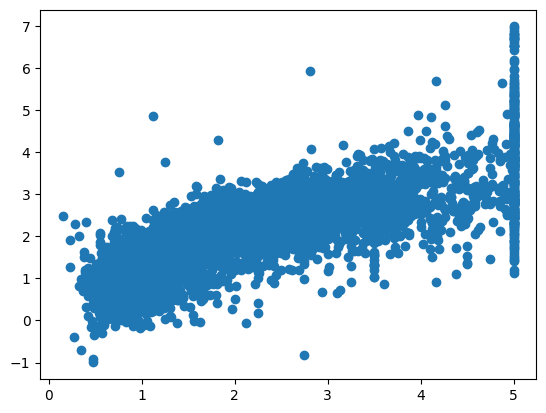

In [24]:
## plot for prediction
plt.scatter(Y_test, reg_pred)

In [25]:
## residuals or errors: should be normal
residuals = Y_test - reg_pred

## plot residuals
sns.displot(residuals, kind='kde')

NameError: name 'sns' is not defined

In [ ]:
## Scatter plot with respect to prediction and residuals
## points should be in uniform distribution
plt.scatter(reg_pred, residuals)


In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(Y_test, reg_pred))
print(mean_absolute_error(Y_test, reg_pred))
print(np.sqrt(mean_squared_error(Y_test, reg_pred)))

0.5475241882233958
0.5424799334532416
0.7399487740535798


In [27]:
# R square and adjusted R square
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, reg_pred)
r2


0.5944602625172049

In [28]:
# Adjusted R square
#  R^2 = 1 - [(1-R2) * (n-1) / (n-k-1)]
# n: no. of observations
# k: no. predictor variables
# adj r2 should be < r2
n=len(Y_test)
k=X_test.shape[1]
1 - ((1- r2) * (n-1)/(n-k-1) )


0.5939355466996628

## New Data Prediction

In [29]:
anyNewData = housing.data[0].reshape(1,-1)

# transformation for every data
stdNewData = scaler.transform(anyNewData)
stdNewData

e:\Space\Code\data science\projects\california-house-price\env\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.35470094,  0.99523793,  0.59013941, -0.1456185 , -0.96096195,
        -0.07101791,  1.04738654, -1.32562573]])

In [38]:
"MedInc":8.3252,
"HouseAge":41.0,
"AveRooms":6.984126984126984,
"AveBedrms":1.0238095238095237,
"Population":322.0,
"AveOccup":2.5555555555555554,
"Latitude":37.88,
"Longitude":-122.23,


MedInc
HouseAge
AveRooms
AveBedrms
Population
AveOccup
Latitude
Longitude
MedHouseVal


[None, None, None, None, None, None, None, None, None]

In [40]:
[print(i) for i in anyNewData[0]]

8.3252
41.0
6.984126984126984
1.0238095238095237
322.0
2.5555555555555554
37.88
-122.23


[None, None, None, None, None, None, None, None]

: 

In [30]:
regression.predict(stdNewData)

array([4.11814336])

# Pickling the model file for the Deployment

In [31]:
import pickle

pickle.dump(regression, open('regmodel.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [32]:
pickledmodel = pickle.load(open('regmodel.pkl', 'rb'))
scaler_ = pickle.load(open('scaler.pkl', 'rb'))

In [33]:
pickledmodel.predict(scaler_.transform(anyNewData))

e:\Space\Code\data science\projects\california-house-price\env\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.11814336])